In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Versão FastAI: 1.0.47
from fastai import *
from fastai.vision import *
from fastai.vision.gan import *
from fastai.callbacks.hooks import *
from fastai.imports import *

import os

import warnings
warnings.filterwarnings("ignore")

print(os.listdir("./dataset/"))

['processo', 'boletos', 'model']


In [2]:
img_dir='./dataset/'
path = Path(img_dir)

In [3]:
data = ImageDataBunch.from_folder(path, 
                                  train=".",
                                  valid_pct=0.2,
                                  size=224,bs=64, 
                                  num_workers=0).normalize(imagenet_stats)

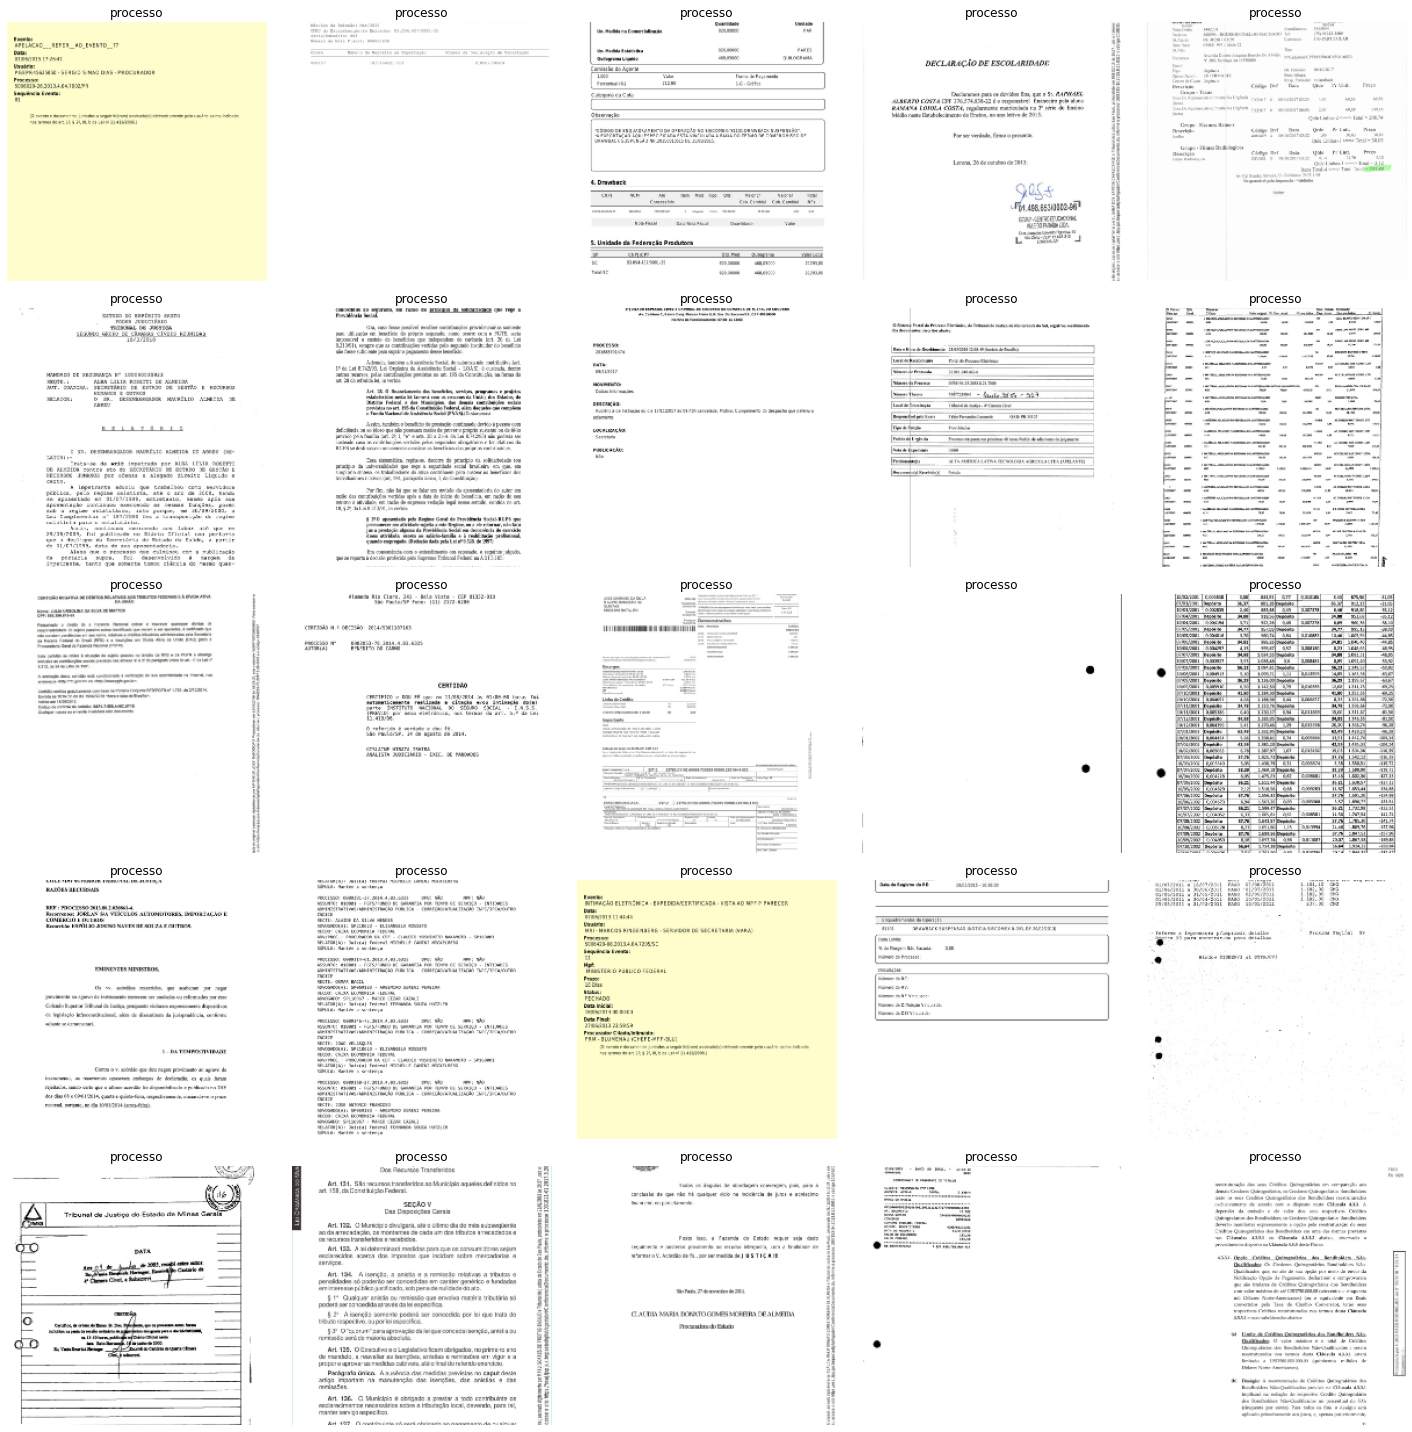

In [4]:
data.show_batch(rows=5)

In [5]:
learn = cnn_learner(data, models.vgg16_bn, metrics=[accuracy, error_rate], model_dir="./model/")

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


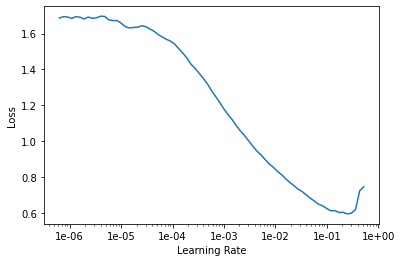

In [6]:
# learn.lr_find()
# learn.recorder.plot()

In [ ]:
learn_rate = 1e-02
learn.fit_one_cycle(6, slice(learn_rate))

epoch,train_loss,valid_loss,accuracy,error_rate,time


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

In [ ]:
learn.export()

In [ ]:
# Métricas no dado de Validação

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

In [ ]:
preds_valid, y_valid = learn.get_preds(ds_type=DatasetType.Valid)

In [ ]:
preds_valid = np.argmax(preds_valid, 1)

In [ ]:
confusion_matrix(y_valid, preds_valid)

In [ ]:
print('f1-score: '+str(f1_score(y_valid, preds_valid)))
print('accuracy: '+str(accuracy_score(y_valid, preds_valid)))

In [ ]:
print(classification_report(y_valid, preds_valid))

In [ ]:
# Métricas no dado de Teste

In [ ]:
learn.data.add_test(ImageList.from_folder('../teste/'))

In [ ]:
preds_test, y_test = learn.get_preds(ds_type=DatasetType.Test)

In [ ]:
preds_test = np.argmax(preds_test, 1)
preds_test

In [ ]:
y_test = []
for x in range(250):
    y_test.append(1)

for x in range(50):
    y_test.append(0)

In [ ]:
torch.tensor(y_test)

In [ ]:
confusion_matrix(y_test, preds_test)

In [ ]:
print('f1-score: '+str(f1_score(y_test, preds_test)))
print('accuracy: '+str(accuracy_score(y_test, preds_test)))

In [ ]:
print(classification_report(y_test, preds_test))

In [ ]:
# Matrizes de confusão

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(y_valid,preds_valid), 
                      normalize    = False,
                      target_names = ['Boleto', 'Processo'],
                      title        = "Confusion Matrix Validation")

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(y_test,preds_test), 
                      normalize    = False,
                      target_names = ['Boleto', 'Processo'],
                      title        = "Confusion Matrix Test")